# I. Data exploration and visualization


In [1]:
from clustering.utils import load_data

# Load the datasets
dataset2 = load_data('./datasets/Dataset2.csv')
iris_dataset = load_data('./datasets/Iris-150.csv')

dataset2.shape, iris_dataset.shape

((178, 12), (150, 4))

### Get a quick overview of the data


In [2]:
import pandas as pd
import numpy as np

# Convert datasets to DataFrames for easier exploration
dataset2_df = pd.DataFrame(dataset2)
iris_dataset_df = pd.DataFrame(iris_dataset)

# Provide a summary of the datasets
summary_dataset2 = dataset2_df.describe()
summary_iris_dataset = iris_dataset_df.describe()

# Display the summary nicely
print("Summary of Dataset2")
print(summary_dataset2)
print("\nSummary of Iris Dataset")
print(summary_iris_dataset)

Summary of Dataset2
               0           1            2           3           4   \
count  178.000000  178.000000   178.000000  178.000000  178.000000   
mean     2.336348    0.957449   746.893258    2.366517    2.029270   
std      1.117146    0.228572   314.907474    0.274344    0.998859   
min      0.740000    0.480000   278.000000    1.360000    0.340000   
25%      1.602500    0.782500   500.500000    2.210000    1.205000   
50%      1.865000    0.965000   673.500000    2.360000    2.135000   
75%      3.082500    1.120000   985.000000    2.557500    2.875000   
max      5.800000    1.710000  1680.000000    3.230000    5.080000   

               5           6           7           8           9           10  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     5.058090    2.295112   19.494944    0.361854    1.590899   99.741573   
std      2.318286    0.625851    3.339564    0.124453    0.572359   14.282484   
min      1.280000    0.98

### See the distribution of each feature per dataset(useful to understand the nature of the data)


<Figure size 1200x800 with 0 Axes>

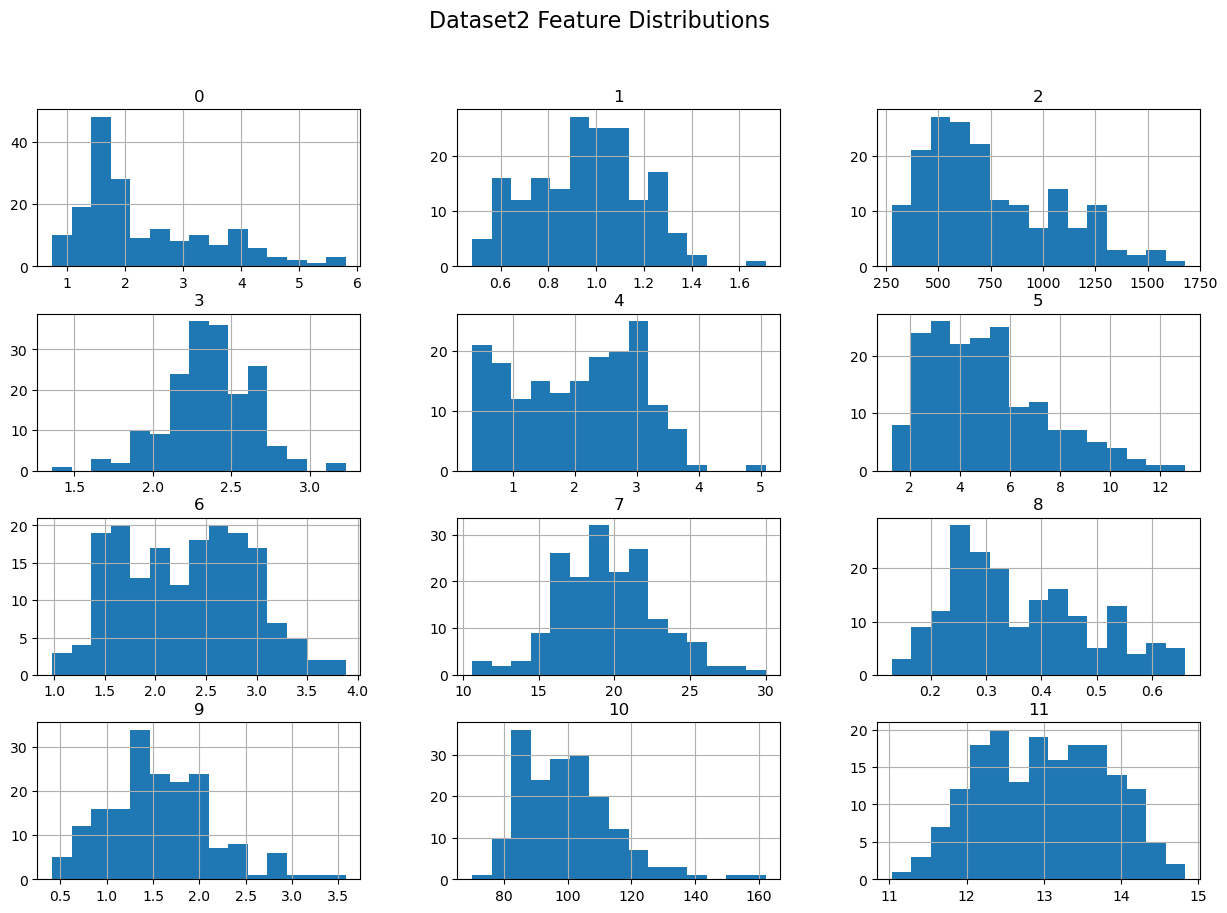

<Figure size 1200x800 with 0 Axes>

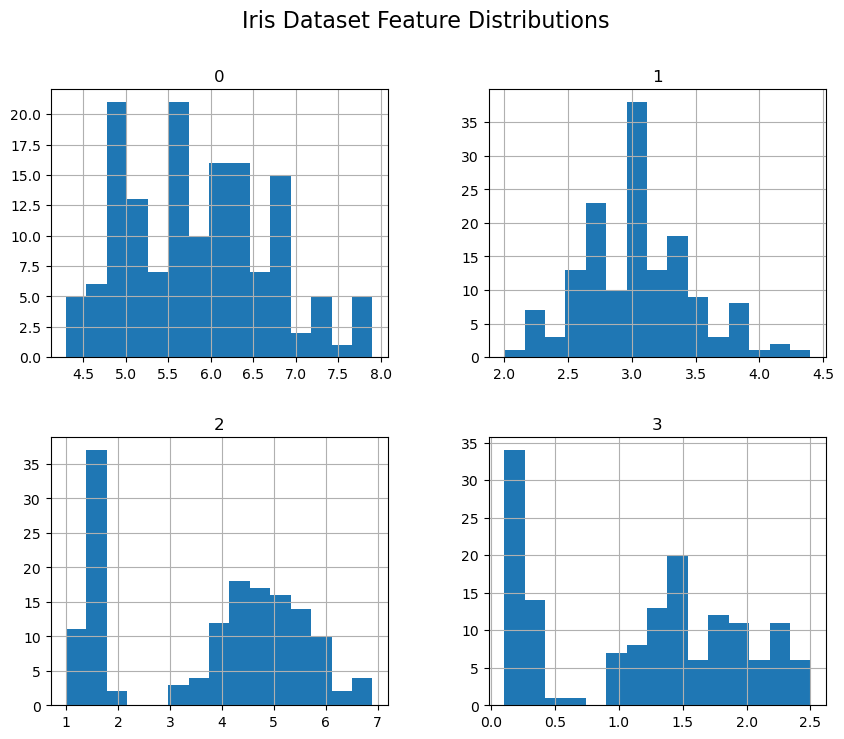

In [3]:
import matplotlib.pyplot as plt

# Visualize distributions of the first dataset (Dataset2)
plt.figure(figsize=(12, 8))
dataset2_df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Dataset2 Feature Distributions", fontsize=16)
plt.show()

# Visualize distributions of the Iris dataset
plt.figure(figsize=(12, 8))
iris_dataset_df.hist(bins=15, figsize=(10, 8), layout=(2, 2))
plt.suptitle("Iris Dataset Feature Distributions", fontsize=16)
plt.show()


### Compute the correlation between features and plot it using a heatmap(we can identify the relationship between features)


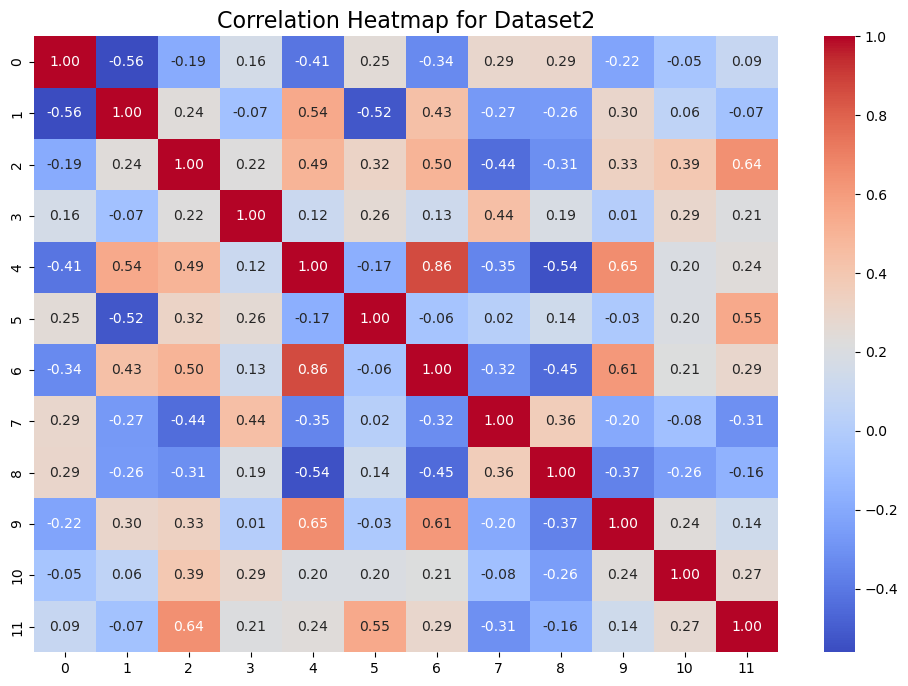

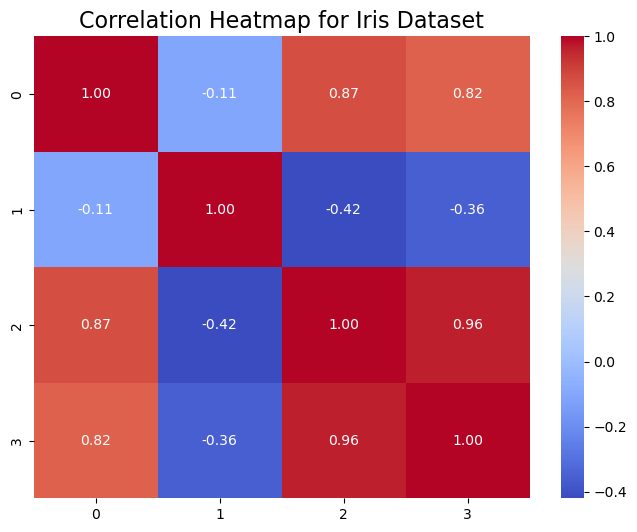

In [4]:
import seaborn as sns

# Correlation Analysis
# Compute correlation matrices for both datasets
correlation_dataset2 = dataset2_df.corr()
correlation_iris_dataset = iris_dataset_df.corr()

# Visualize correlation matrices
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_dataset2, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Dataset2", fontsize=16)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_iris_dataset, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap for Iris Dataset", fontsize=16)
plt.show()


### A boxplot can help us visualize if we might have outliers in the data or if we need to normalize the data


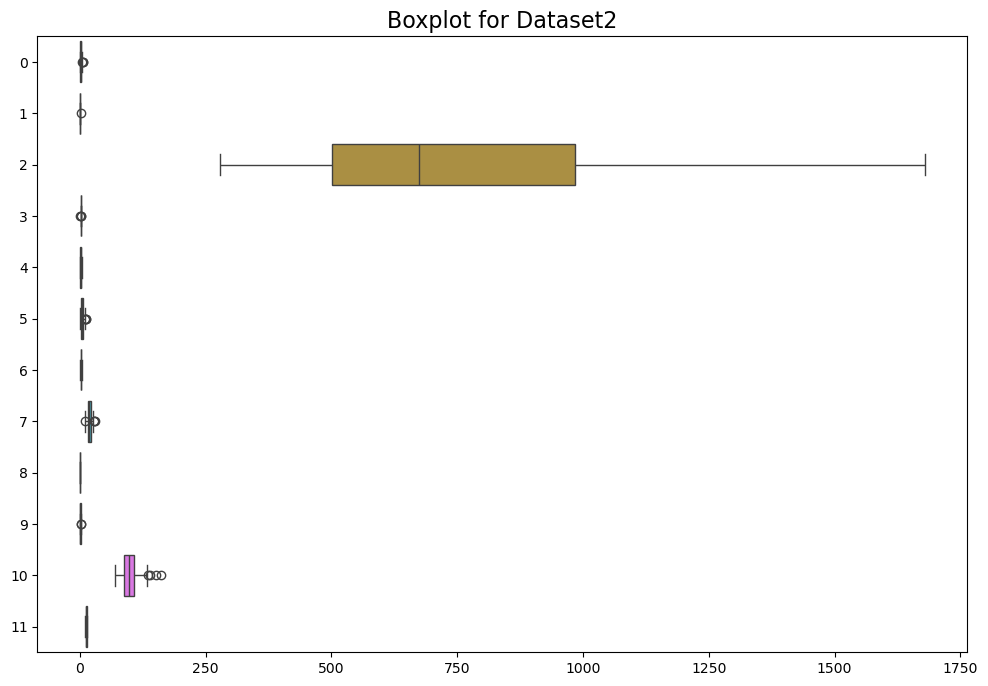

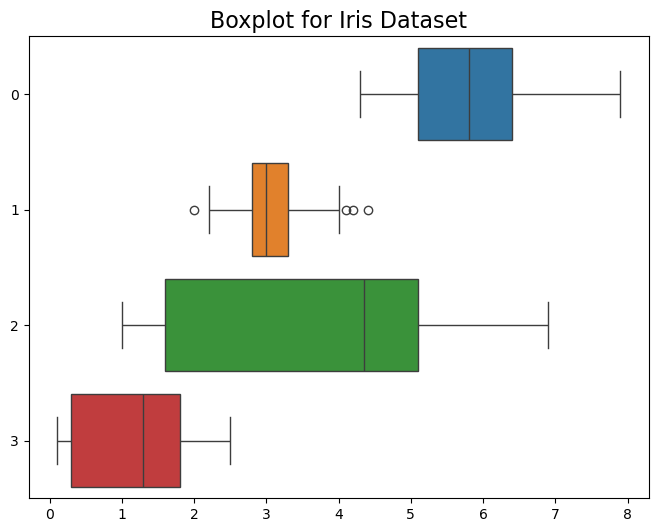

In [5]:
# Boxplot for Dataset2
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset2_df, orient="h")
plt.title("Boxplot for Dataset2", fontsize=16)
plt.show()

# Boxplot for Iris Dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_dataset_df, orient="h")
plt.title("Boxplot for Iris Dataset", fontsize=16)
plt.show()

# II. Data preprocessing


We need to preprocess and clean the data before doing anything else. Usually, we need to:

1. Feature scaling
2. Dimensionality reduction
3. Outlier treatment
4. Missing value treatment

Now, using the insights from the data exploration, we can preprocess the data accordingly.
Let's start with the number 2 and 4. Point 4 is not necessary because the are no missing values in either dataset and we will not use any dimensionality reduction technique since we have a small number of features(4 for the iris dataset and 12 for dataset 2).


In [6]:
# Demonstrate there are no missing values in the datasets
missing_dataset2 = dataset2_df.isnull().sum()
missing_iris = iris_dataset_df.isnull().sum()

# Display the missing values
print("Missing values in Dataset2")
print(missing_dataset2)
print("\nMissing values in Iris Dataset")
print(missing_iris)

Missing values in Dataset2
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

Missing values in Iris Dataset
0    0
1    0
2    0
3    0
dtype: int64


From the previous section we know that the data in dataset 2 is not scaled, values have different ranges and we can't see the boxplot clearly because of that. In the next section we want to use clustering algorithms to find the best number of clusters and maybe with it the number of target classes. The problem is that those methods are distance-based(e.g., Euclidean distance) and the distance between points is influenced by the scale of the features(e.g., Feature 2 ranges will dominate the distance calculations). So, we need to scale the data before applying any clustering algorithm. For the iris dataset, we don't need to scale the data because the values have smaller ranges, but we will do it anyway to be consistent with the preprocessing of dataset 2.

For feature scaling there exists 2 common techniques :

- Normalization: Scale features to [0, 1]
- Standardization: Z= (X−μ)/σ(mean = 0, variance = 1).

I will use the Standardization technique because it is less sensitive to outliers but also because the clustering algorithms might be give better results if
we leave the data in the same ranges. Besides, the features in dataset 2 are already normally distributed. For more details click [here](https://www.geeksforgeeks.org/normalization-vs-standardization/).

To be able to visulize the possible outliers in the data we will standardize the data of dataset 2 and plot the boxplot again.


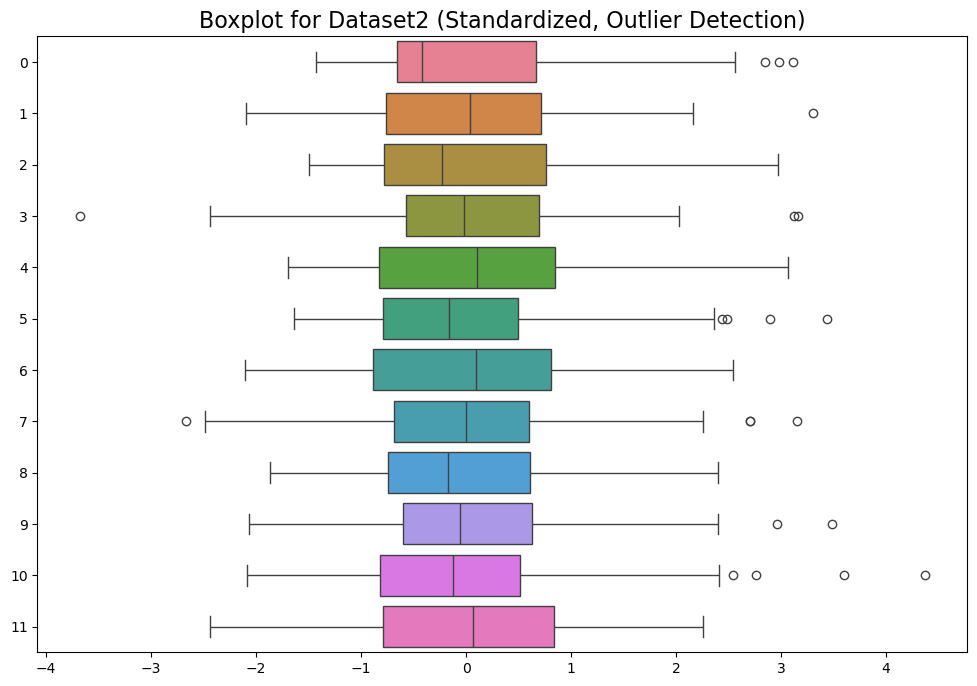

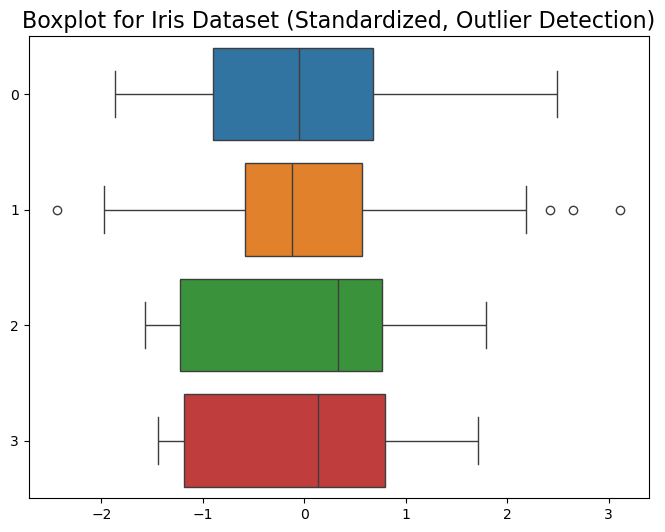

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardization for Dataset2
scaler_dataset2 = StandardScaler()
dataset2_scaled = scaler_dataset2.fit_transform(dataset2_df)
dataset2_scaled_df = pd.DataFrame(dataset2_scaled, columns=dataset2_df.columns)

# Standardization for Iris Dataset
scaler_iris = StandardScaler()
iris_scaled = scaler_iris.fit_transform(iris_dataset_df)
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris_dataset_df.columns)

# Redo the boxplot for the standardized Dataset2
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset2_scaled_df, orient="h")
plt.title("Boxplot for Dataset2 (Standardized, Outlier Detection)", fontsize=16)
plt.show()

# Redo the boxplot for the standardized Iris Dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_scaled_df, orient="h")
plt.title("Boxplot for Iris Dataset (Standardized, Outlier Detection)", fontsize=16)
plt.show()

Now that we can see the boxplot clearly, we can see that there are some outliers in both datasets. The boxplots uses IQR method to label points as outliers. The IQR method is defined as the range between the first quartile(Q1) and the third quartile(Q3) of the data. The points that are below Q1 - 1.5 _ IQR or above Q3 + 1.5 _ IQR are considered outliers. For more details click [here](https://www.statology.org/find-outliers-with-iqr/).

We will import a custom function to remove outliers and return the cleaned data using the IQR method.


In [8]:
from clustering.utils import remove_outliers

# Remove outliers from Dataset2 and Iris Dataset
dataset2_no_outliers = remove_outliers(dataset2_scaled_df)
iris_no_outliers = remove_outliers(iris_scaled_df)

# Display the shapes of the datasets after outlier removal
dataset2_no_outliers_shape = dataset2_no_outliers.shape
iris_no_outliers_shape = iris_no_outliers.shape

dataset2_no_outliers_shape, iris_no_outliers_shape

((161, 12), (146, 4))

# III. Clustering the data


We will need to convert the cleaned data to numpy arrays since the fuctions implemented by us require numpy arrays as input.


In [9]:
# Convert the datasets without outliers back to numpy arrays
dataset2_np = dataset2_no_outliers.to_numpy()
iris_np = iris_no_outliers.to_numpy()

# Keep both the DataFrame and numpy array versions
dataset2_df = dataset2_no_outliers  # DataFrame version for convenience
iris_df = iris_no_outliers         # DataFrame version for convenience

dataset2_np.shape, iris_np.shape

((161, 12), (146, 4))

We will use our own implementation of the KMeans and FuzzyCMeans algorithms to cluster the data and the Elbow method to find the best number of clusters. The Elbow method is a heuristic method that uses the sum of squared distances between the data points and their assigned clusters to find the best number of clusters. The idea is to find the point where the sum of squared distances starts to decrease in a linear fashion. For more details click [here](<https://en.wikipedia.org/wiki/Elbow_method_(clustering)>).

While we can visually inspect the Elbow plot to find the best number of clusters, we can also use the a more quantitative approach. A naive approach is to calculate the derivative of the sum of squared distances and find the point where the derivative is the highest. This point is the best number of clusters. We will instead use a dedicated package named "kneed" that is specifically designed to find the knee point in the Elbow plot.


In [10]:
from clustering.kmeans import KMeans
from clustering.fuzzy import FuzzyCMeans
from clustering.utils import calculate_sse_fuzzy, calculate_sse, find_elbow_point

def elbow_method(data: np.ndarray, max_k: int = 10, method: str = "kmeans"):
    """
    Applies the Elbow method to the given data, trying k=1..max_k 
    using the specified clustering method and plotting the SSE for each k.
    
    :param data: Dataset as (n_samples, n_features).
    :param max_k: Maximum number of clusters to try.
    :param method: Clustering method to use ("kmeans" or "fuzzy").
    """
    if method not in ["kmeans", "fuzzy"]:
        raise ValueError("Invalid method. Choose 'kmeans' or 'fuzzy'.")

    sse_values = []
    ks = range(1, max_k + 1)

    for k in ks:
        if method == "kmeans":
            kmeans = KMeans(n_clusters=k, max_iter=100, tolerance=1e-3)
            clusters, centers, labels = kmeans.run(data)
            sse = calculate_sse(clusters, centers, k)
        elif method == "fuzzy":
            fcm = FuzzyCMeans(n_clusters=k, max_iter=100, tolerance=1e-3, fuzzification=2.0)
            clusters, centers, labels, membership = fcm.run(data)
            sse = calculate_sse_fuzzy(data, centers, k, membership)
        sse_values.append(sse)

    # Find the optimal k using the Elbow method
    optimal_k = find_elbow_point(sse_values, ks, plot=True)
    print(f"Optimal number of clusters (k): {optimal_k}")



KMeans converged after iteration: 2
KMeans converged after iteration: 3
KMeans converged after iteration: 7
KMeans converged after iteration: 9
KMeans converged after iteration: 7
KMeans converged after iteration: 13
KMeans converged after iteration: 9
KMeans converged after iteration: 9
KMeans converged after iteration: 8
KMeans converged after iteration: 7


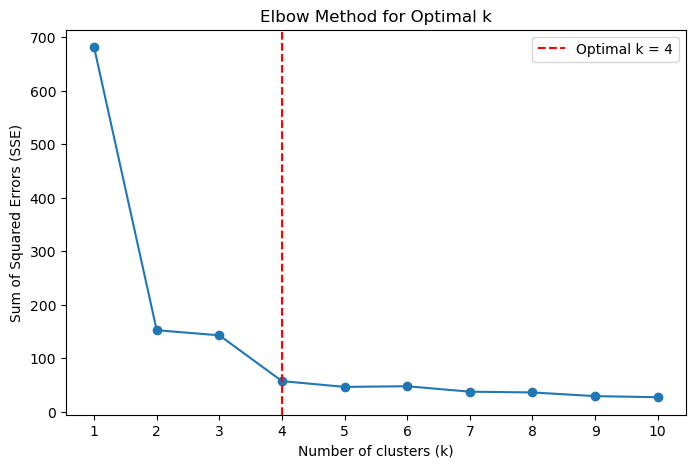

Optimal number of clusters (k): 4
KMeans converged after iteration: 2
KMeans converged after iteration: 6
KMeans converged after iteration: 4
KMeans converged after iteration: 9
KMeans converged after iteration: 12
KMeans converged after iteration: 8
KMeans converged after iteration: 6
KMeans converged after iteration: 8
KMeans converged after iteration: 10
KMeans converged after iteration: 11


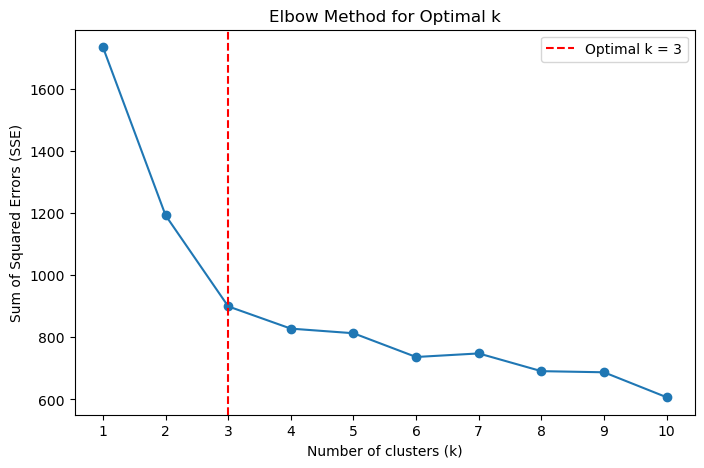

Optimal number of clusters (k): 3


In [11]:
elbow_method(iris_dataset, max_k=10, method="kmeans")
elbow_method(dataset2_np, max_k=10, method="kmeans")

FuzzyCMeans converged after iteration: 2
FuzzyCMeans converged after iteration: 9
FuzzyCMeans converged after iteration: 18
FuzzyCMeans converged after iteration: 28
FuzzyCMeans converged after iteration: 31
FuzzyCMeans converged after iteration: 63
FuzzyCMeans converged after iteration: 61
FuzzyCMeans converged after iteration: 51
FuzzyCMeans converged after iteration: 25
FuzzyCMeans converged after iteration: 43


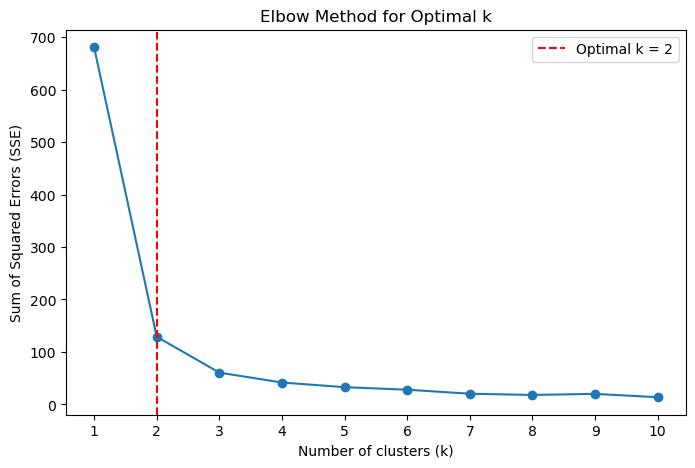

Optimal number of clusters (k): 2
FuzzyCMeans converged after iteration: 2
FuzzyCMeans converged after iteration: 13
FuzzyCMeans converged after iteration: 24
FuzzyCMeans converged after iteration: 48
FuzzyCMeans converged after iteration: 89
FuzzyCMeans ended after max_iter = 100
FuzzyCMeans ended after max_iter = 100
FuzzyCMeans ended after max_iter = 100
FuzzyCMeans converged after iteration: 69
FuzzyCMeans converged after iteration: 74


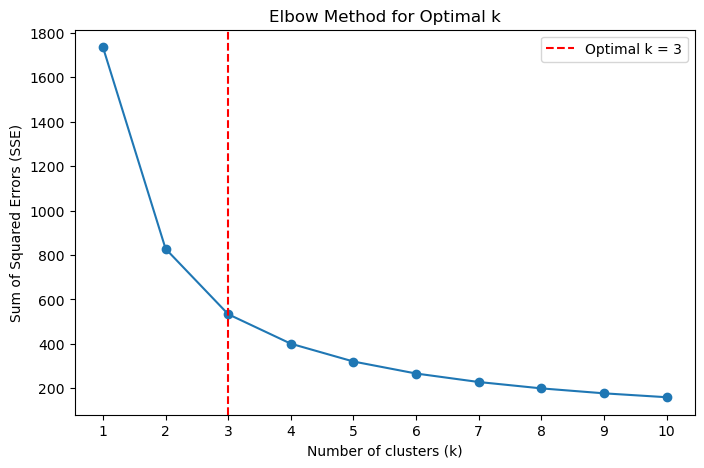

Optimal number of clusters (k): 3


In [12]:
elbow_method(iris_dataset, max_k=10, method="fuzzy")
elbow_method(dataset2_np, max_k=10, method="fuzzy")

From the plots above we can see that the best number of clusters for the iris dataset is 2-3 depending on the algorithm used, witch is consistent with the number of target classes from the dataset.

For dataset 2 the best number of clusters is always 3. To validate our apporch we will use the best number of clusters found by the Elbow method to cluster the data using both KMeans and FuzzyCMeans.


Processing using kmeans clustering...
KMeans converged after iteration: 12


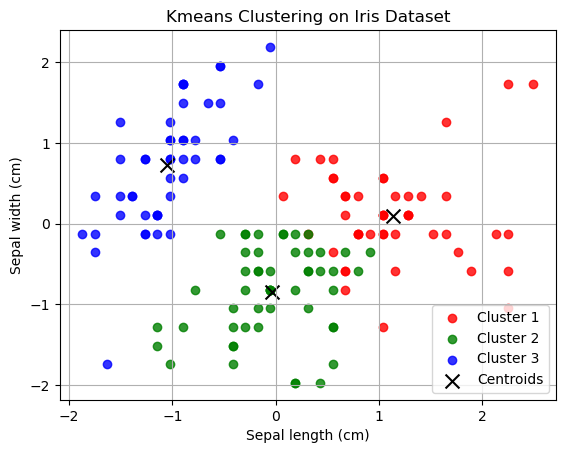

Processing using fuzzy clustering...
FuzzyCMeans converged after iteration: 17


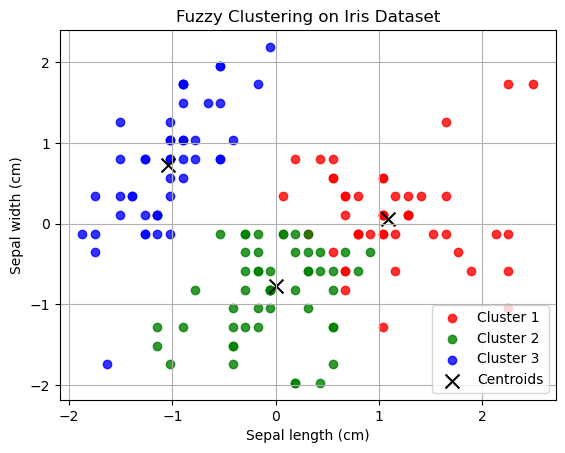

In [19]:
from clustering.utils import plot_clusters

# Setting up parameters
k = 3

methods = {
    "kmeans": KMeans,
    "fuzzy": FuzzyCMeans
}

feature_names_iris=["Sepal length (cm)", "Sepal width (cm)"]

# Iterate through clustering methods
for method_name, ClusteringClass in methods.items():
    print(f"Processing using {method_name} clustering...")
    
    if method_name == "kmeans":
        clustering = ClusteringClass(n_clusters=k, max_iter=100, tolerance=1e-3)
        clusters, centers, labels = clustering.run(iris_np)
    elif method_name == "fuzzy":
        clustering = ClusteringClass(n_clusters=k, max_iter=100, tolerance=1e-3, fuzzification=2.0)
        clusters, centers, labels, membership = clustering.run(iris_np)

    # Plot the clusters
    plot_clusters(clusters, centers,  feature_names_iris, title=f"{method_name.capitalize()} Clustering on Iris Dataset")

KMeans converged after iteration: 5
KMeans Results for Dataset 2:


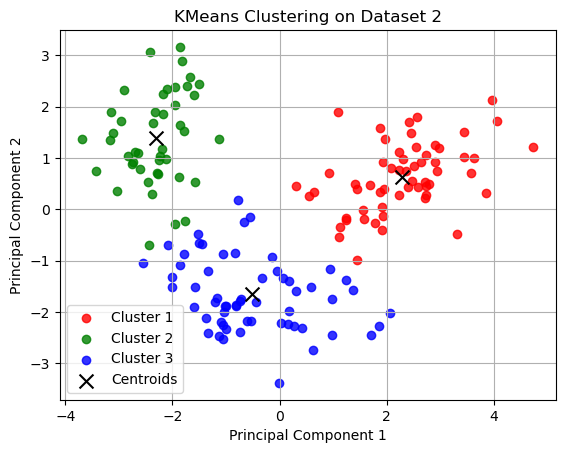

FuzzyCMeans converged after iteration: 13
FuzzyCMeans Results for Dataset 2:


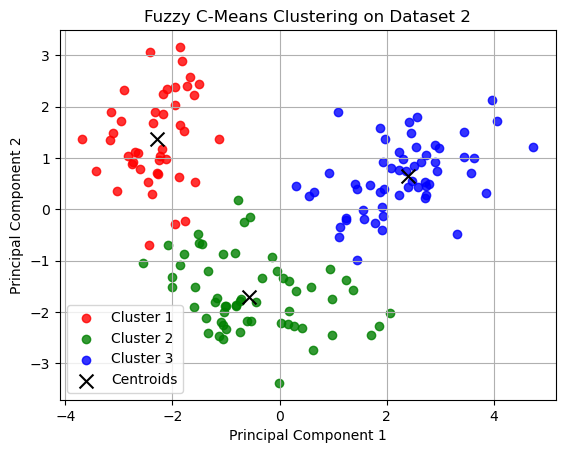

In [20]:
from clustering.utils import reduce_to_2d

feature_names_dataset2=["Principal Component 1", "Principal Component 2"]

# Reduce to 2D using PCA
dataset2_2d = reduce_to_2d(dataset2_np)

# Clustering with KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, tolerance=1e-3)
clusters_kmeans, centers_kmeans, labels_kmeans = kmeans.run(dataset2_2d)

# Prepare clusters for plotting
clusters_kmeans_plot = [
    [dataset2_2d[idx] for idx in range(len(labels_kmeans)) if labels_kmeans[idx] == c]
    for c in range(3)
]

# Plot KMeans result
print("KMeans Results for Dataset 2:")
plot_clusters(clusters_kmeans_plot, centers_kmeans, feature_names_dataset2, title="KMeans Clustering on Dataset 2")

# Clustering with FuzzyCMeans
fcm = FuzzyCMeans(n_clusters=3, max_iter=100, tolerance=1e-3, fuzzification=2.0)
clusters_fcm, centers_fcm, labels_fcm, membership_fcm = fcm.run(dataset2_2d)

# Prepare clusters for plotting
clusters_fcm_plot = [
    [dataset2_2d[idx] for idx in range(len(labels_fcm)) if np.argmax(membership_fcm[idx]) == c]
    for c in range(3)
]

# Plot FuzzyCMeans result
print("FuzzyCMeans Results for Dataset 2:")
plot_clusters(clusters_fcm_plot, centers_fcm, feature_names_dataset2, title="Fuzzy C-Means Clustering on Dataset 2")


We made a custom plotting function to plot the clusters and the centroids. As we can see from the resulting plots we succesfully clustered the data into the expected number of clusters. The centroids are also correctly placed in the middle of those clusters.

For the second dataset its a bit harder to visualize the clusters because we have 12 features and we also don't know the true number of clusterts. A natural approach is to use PCA to reduce the dimensionality of the data and then plot the clusters. Even if we potentially lose some information during this process(PCA is a form of compresion after all) we will still have the "essace" of the data and it's possible classes. We will use the first 2 principal components to plot the clusters then we will use the the unsupervised algorithms to see if we can confirm the number of clusters found by the Elbow method is correct.

To my surprise, the number of clusters not only seems to be correct but the clusters are also more separated then the iris dataset(even if in that case we used only 2 of the 4 features). This is a good sign that the Elbow method is working as expected and that the data is well clustered by the algorithms. From this we will move forword with the hypothesis that the number of distring classes is 3, as found by the Elbow method.


In [29]:
X = dataset2_2d
y = np.array(labels_kmeans) # In this case the labels are the same for both methods

# Randomly shuffle the data
np.random.seed(42)
shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]

X, y

(array([[-3.02833804,  0.35309194],
        [-1.94867801,  2.03080613],
        [ 2.90325977,  0.92782648],
        [-0.73186235, -1.79363283],
        [-2.18143227,  2.25325659],
        [-2.38303179,  0.30249298],
        [-3.10703009,  1.48463442],
        [-1.02163331, -1.88196801],
        [-2.32967988,  1.89719165],
        [ 1.56790463, -0.19113803],
        [ 1.24270138, -1.37498154],
        [-2.23089692,  1.02949803],
        [ 1.84834311, -2.26967186],
        [-0.82018604, -1.88564551],
        [-1.78707685, -0.86665289],
        [ 0.31283667, -1.60221445],
        [ 2.56924961,  1.80267645],
        [ 1.23627559, -0.17035418],
        [-2.7048422 ,  1.11619725],
        [-0.60869984, -2.16836658],
        [-2.59721639,  0.78727071],
        [-1.45793516, -0.66754095],
        [ 1.70508738, -2.44600484],
        [-1.34249855, -1.20915574],
        [ 0.17472859, -1.98302227],
        [ 0.55078545,  0.26292337],
        [-1.7772527 ,  1.53276437],
        [-1.51436767, -0.487

# IV. Predicting the target classes


In [31]:
# TODOs:
# Note: We used the iris dataset for validation purposes, but the main focus is on Dataset2
# 1. Split the data into training and testing sets (80% training, 20% testing)
# 2. Train a Decision Tree, Random Forest, and CatBoost and see how they perform
# 3. Compare the results of the three models
# 4. Visualize the decision boundaries of the best model/ the results of the best model(they are all tree-based models)
# 5. Add markdown cells to explain the steps and the results here
# 6. Verify each markdown in this notebook
# 7. Look at the rest of the code if you dont need to change anything
# 8. Git commit and push the changes
# 9. Start working on the documentation